In [1]:
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from ast import literal_eval
import plotly_express as px
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import os

import eta_tools

/Users/amikano/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Handmade package 'eta_tools' successfully imported.


In [2]:
cwd = os.getcwd()

CORPUS = pd.read_csv(cwd+"/output/CORPUS.csv")
LIB = pd.read_csv(cwd+"/output/LIB.csv")
VOCAB = pd.read_csv(cwd+"/output/VOCAB.csv")

In [3]:
CORPUS

review_id  sent_id  token_id  \
0       Twelfth Night is a New Perspective at the Nati...        0         0   
1       Twelfth Night is a New Perspective at the Nati...        0         1   
2       Twelfth Night is a New Perspective at the Nati...        0         2   
3       Twelfth Night is a New Perspective at the Nati...        0         3   
4       Twelfth Night is a New Perspective at the Nati...        0         4   
...                                                   ...      ...       ...   
281420              ART's Julius Caesar Swings and Misses       38        21   
281421              ART's Julius Caesar Swings and Misses       38        22   
281422              ART's Julius Caesar Swings and Misses       38        23   
281423              ART's Julius Caesar Swings and Misses       38        24   
281424              ART's Julius Caesar Swings and Misses       38        25   

             term_str                pos_tuple  pos  
0              golden         ('golden', 'JJ')   JJ  
1               brown          ('brown', 'NN')   NN  
2              leaves        ('leaves', 'VBZ')  VBZ  
3            decorate      ('decorate', 'VBP')  VBP  
4                 the            ('the', 'DT')   DT  
...               ...                      ...  ...  
281420            not            ('not', 'RB')   RB  
281421             at             ('at', 'IN')   IN  
281422              a              ('a', 'DT')   DT  
281423  disassociated  ('disassociated', 'JJ')   JJ  
281424       distance       ('distance', 'NN')   NN  

[281425 rows x 6 columns]

In [4]:
LIB

Original Work                                       Review Title  \
0    Twelfth Night  Twelfth Night is a New Perspective at the Nati...   
1    Twelfth Night   Twelfth Night Offers Clarity with Complications    
2    Twelfth Night  Twelfth Night Goes for Synthesis through Antit...   
3    Twelfth Night  Shakespeare Set in the Summer of Love: "There'...   
4    Twelfth Night                  Big Things Come in Small Packages   
..             ...                                                ...   
287  Julius Caesar  Boredom from Julius Caesar? NYC Buries Pigeon ...   
288  Julius Caesar                  Stars Rise as Mighty Caesar Falls   
289  Julius Caesar                                 An American Caesar   
290  Julius Caesar      Julius Caesar Takes a Stab at the Shakespeare   
291  Julius Caesar              ART's Julius Caesar Swings and Misses   

            Review Author                                            Content  \
0       Christopher Adams  golden brown leaves decorate the edges of the ...   
1    Claudine Nightingale   ive been eagerly awaiting the arrival of greg...   
2         Denise Battista  hear ye hear ye! shakespeare at stinson beach ...   
3         Denise Battista  i was born in the 70s but that doesnt mean i w...   
4       Carrie Cleaveland  city lit's production of twelfth night proves ...   
..                    ...                                                ...   
287        Roseanne Wells  pigeon creek shakespeare company which origina...   
288       Denise Battista  in shakespeares julius caesar the plot is simp...   
289      Michael Kostroff   if youve never seen a play at theatricum bota...   
290   Georgina Petronella  julius caesar is the first shakespeare play i ...   
291            Jess Pease  although it's sometimes hard to imagine in man...   

     Overall Rating    Genre Rating Category  
0                 3   Comedy        Negative  
1                 4   Comedy        Positive  
2                 4   Comedy        Positive  
3                 5   Comedy        Positive  
4                 4   Comedy        Positive  
..              ...      ...             ...  
287               1  Tragedy        Negative  
288               4  Tragedy        Positive  
289               4  Tragedy        Positive  
290               4  Tragedy        Positive  
291               2  Tragedy        Negative  

[292 rows x 7 columns]

In [5]:
lib_og_count = LIB["Original Work"].value_counts()
lib_og_count.to_csv(cwd+'/output/lib_og_count.csv')
lib_og_count

Midsummer Night's Dream      50
Hamlet                       40
Macbeth                      39
Twelfth Night                37
Romeo & Juliet               36
As You Like It               26
All's Well That Ends Well    19
Julius Caesar                19
Love's Labour's Lost         13
Othello                      13
Name: Original Work, dtype: int64

In [6]:
lib_genre_count = LIB["Genre"].value_counts()
lib_genre_count.to_csv(cwd+'/output/lib_genre_count.csv')
lib_genre_count

Tragedy    147
Comedy     145
Name: Genre, dtype: int64

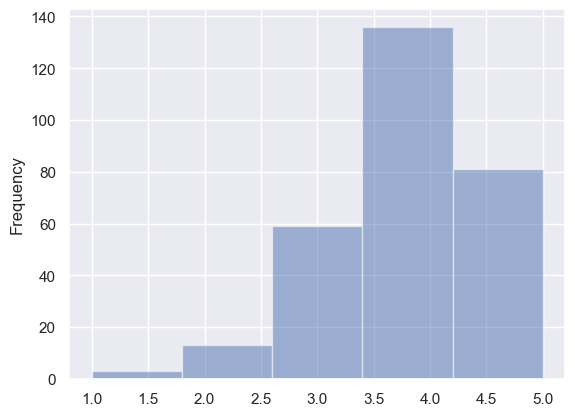

In [7]:
LIB["Overall Rating"].plot.hist(bins=5, alpha=0.5);

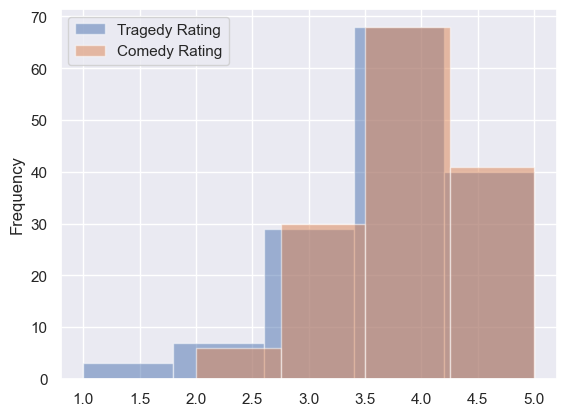

In [8]:
fig, ax = plt.subplots()
LIB[LIB.Genre=="Tragedy"]["Overall Rating"].to_frame("Tragedy Rating")\
                .reset_index().drop("index", axis=1).plot.hist(bins=5, alpha=0.5, ax=ax)
LIB[LIB.Genre=="Comedy"]["Overall Rating"].to_frame("Comedy Rating")\
                .reset_index().drop("index", axis=1).plot.hist(bins=4, alpha=0.5, ax=ax);

fig.savefig(cwd+'/output/images/rating_histogram.png')

In [9]:
VOCAB = VOCAB.set_index('term_str')

In [10]:
VOCAB.sort_values('n', ascending=False)

n  n_chars         p          i max_pos  n_pos  stop  \
term_str                                                                 
the           19213        3  0.068270   3.872596      DT      1     1   
and           10397        3  0.036944   4.758511      CC      1     1   
of             8942        2  0.031774   4.976009      IN      1     1   
a              7691        1  0.027329   5.193435      DT      1     1   
to             6429        2  0.022844   5.452012      TO      1     1   
...             ...      ...       ...        ...     ...    ...   ...   
interwoven        1       10  0.000004  18.102391      JJ      1     0   
intimates         1        9  0.000004  18.102391     NNS      1     0   
intimidated       1       11  0.000004  18.102391     VBN      1     0   
intimidation      1       12  0.000004  18.102391      NN      1     0   
à                 1        1  0.000004  18.102391     NNP      1     0   

             stem_porter stem_snowball stem_lancaster  
term_str                                               
the                  the           the            the  
and                  and           and            and  
of                    of            of             of  
a                      a             a              a  
to                    to            to             to  
...                  ...           ...            ...  
interwoven    interwoven    interwoven       interwov  
intimates          intim         intim          intim  
intimidated      intimid       intimid        intimid  
intimidation     intimid       intimid        intimid  
à                      à             à              à  

[23236 rows x 10 columns]

## Topic Modeling

In [11]:
noun_verb = ["NN", "NNS", 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']  

In [12]:
CORPUS = CORPUS[CORPUS.pos.isin(noun_verb)]
VOCAB = VOCAB[VOCAB.max_pos.isin(noun_verb)]

In [13]:
model = eta_tools.topic_model(CORPUS, 25)

In [14]:
model.topics.sort_values("term_freq", ascending=False).head(5)

term_str           0           1         2        3         4         5  \
topic_id                                                                  
T04             play  production       end   actors     sense    period   
T00           design         set   costume     play  costumes  designer   
T06            stage       plays  audience    scene    center    gender   
T21       production        role     night  theatre     plays     title   
T19             love        turn     falls     life     world     story   

term_str         6                                              label  \
topic_id                                                                
T04          stage  T04 play, production, end, actors, sense, peri...   
T00       lighting  T00 design, set, costume, play, costumes, desi...   
T06        balcony  T06 stage, plays, audience, scene, center, gen...   
T21            bit  T21 production, role, night, theatre, plays, t...   
T19          woman   T19 love, turn, falls, life, world, story, woman   

term_str  doc_weight_sum  term_freq  
topic_id                             
T04           630.540399   0.050177  
T00           619.240025   0.049460  
T06           579.408213   0.046165  
T21           607.044870   0.045968  
T19           599.022900   0.043170

In [15]:
model.topics[list(LIB['Genre'].unique())] \
        = model.theta.join(LIB.set_index('Review Title'), on='review_id')\
                .groupby('Genre')[model.theta.columns].mean().T

model.topics.sort_values('term_freq', ascending=False)\
        [['Comedy', 'Tragedy', 'label']]\
        .style.background_gradient(cmap="YlGnBu", axis=None)

In [16]:
model.topics[list(LIB['Rating Category'].unique())] \
        = model.theta.join(LIB.set_index('Review Title'), on='review_id')\
                .groupby('Rating Category')[model.theta.columns].mean().T

model.topics.sort_values('term_freq', ascending=False)\
        [['Positive', 'Negative', 'label']].style.background_gradient(cmap="YlGnBu", axis=None)

In [17]:
model.topics[list(LIB['Original Work'].unique())] \
        = model.theta.join(LIB.set_index('Review Title'), on='review_id')\
                .groupby('Original Work')[model.theta.columns].mean().T

model.topics.sort_values('term_freq', ascending=False)\
        [list(LIB['Original Work'].unique())+['label']].style.background_gradient(cmap="YlGnBu", axis=None)

In [18]:
model.theta

T00       T01  \
review_id                                   sent_id                       
 A Decisive Hamlet in a Post-colonial World 0        0.005000  0.005000   
                                            1        0.003636  0.003636   
                                            2        0.680000  0.013333   
                                            3        0.010000  0.010000   
                                            4        0.006667  0.006667   
...                                                       ...       ...   
iHamlet at the Philly Fringe                31       0.003077  0.737993   
                                            32       0.003077  0.003077   
                                            33       0.005714  0.005714   
                                            34       0.004444  0.004444   
                                            35       0.006667  0.006667   

                                                          T02       T03  \
review_id                                   sent_id                       
 A Decisive Hamlet in a Post-colonial World 0        0.005000  0.005000   
                                            1        0.003636  0.003636   
                                            2        0.013333  0.013333   
                                            3        0.010000  0.010000   
                                            4        0.006667  0.006667   
...                                                       ...       ...   
iHamlet at the Philly Fringe                31       0.003077  0.003077   
                                            32       0.450643  0.003077   
                                            33       0.005714  0.005714   
                                            34       0.004444  0.004444   
                                            35       0.006667  0.506667   

                                                          T04       T05  \
review_id                                   sent_id                       
 A Decisive Hamlet in a Post-colonial World 0        0.005000  0.005000   
                                            1        0.003636  0.003636   
                                            2        0.013333  0.013333   
                                            3        0.010000  0.010000   
                                            4        0.006667  0.006667   
...                                                       ...       ...   
iHamlet at the Philly Fringe                31       0.003077  0.003077   
                                            32       0.003077  0.003077   
                                            33       0.005714  0.005714   
                                            34       0.004444  0.004444   
                                            35       0.006667  0.340000   

                                                          T06       T07  \
review_id                                   sent_id                       
 A Decisive Hamlet in a Post-colonial World 0        0.005000  0.005000   
                                            1        0.003636  0.003636   
                                            2        0.013333  0.013333   
                                            3        0.010000  0.010000   
                                            4        0.006667  0.181573   
...                                                       ...       ...   
iHamlet at the Philly Fringe                31       0.003077  0.003077   
                                            32       0.003077  0.003077   
                                            33       0.005714  0.005714   
                                            34       0.004444  0.004444   
                                            35       0.006667  0.006667   

                                                          T08       T09  ...  \
review_id                                   sent_id                      .

In [19]:
model.phi

term_str      aaron  abandoned  abilities    ability  absurdity   academy  \
topic_id                                                                    
T00        3.640172   0.040000   0.040000   0.040000   0.040000  0.461433   
T01        0.040000   0.040000   1.040000   1.283495   0.040000  0.040000   
T02        0.040000   0.040000   0.040000   1.891871   1.336108  0.040000   
T03        0.040038   1.040000   0.040000   0.040000   0.040000  1.618567   
T04        0.040000   0.040000   0.040000  23.268589   0.972227  0.040000   
T05        0.040000   0.040000   0.040000   0.040000   0.040000  1.040000   
T06        0.040000   0.040000   0.040000   0.040000   3.222887  0.040000   
T07        0.226821   0.040000   1.040000   2.128342   2.603858  0.040000   
T08        0.040000   1.040000   0.040000   0.764605   2.040000  0.040000   
T09        0.040000   0.040000   0.040000   0.040000   0.040000  0.040000   
T10        0.040000   0.040000   0.040000   0.040000   0.040000  0.040000   
T11        0.040000   0.040000   0.040000   0.040000   0.040000  0.040000   
T12        2.040000   0.040000   1.040000   0.157835   0.040000  1.040000   
T13        0.040000   5.729791   0.040000   0.040000   0.040000  1.714898   
T14        1.127818   0.040000   1.302207   4.336433   1.107773  1.365102   
T15        0.040000   2.109346   0.040000   0.040000   0.040000  0.040000   
T16        0.040000   0.040000   0.040000   2.416003   0.040000  1.040000   
T17        6.284996   0.040000   0.040000   0.040000   0.040000  0.040000   
T18        0.040000   0.040000   0.040000   0.040000   0.040000  0.040000   
T19        1.040000   0.148960   1.792491   0.333562   0.040000  0.040000   
T20       10.889430   0.040000   0.040000   0.040000   1.386884  0.040000   
T21        0.040000   0.040000   2.287509   0.156189   0.040000  0.040000   
T22        0.040000   0.040000   0.040000   0.040000   2.650263  0.040000   
T23        0.040000   1.171903   0.777793   3.040000   0.040000  0.040000   
T24        0.070726   0.040000   1.040000   0.703075   0.040000  0.040000   

term_str    accent  accented   accents    accept  ...       year      years  \
topic_id                                          ...                         
T00       4.085835      1.04  0.040000  0.040000  ...   0.040000   0.040000   
T01       0.040000      0.04  0.040000  0.040000  ...   0.040000   0.049313   
T02       1.080222      1.04  1.131285  0.040000  ...   0.044697   0.040000   
T03       3.045136      0.04  7.935159  0.040000  ...   4.701786   0.048742   
T04       1.040000      0.04  0.040000  9.520845  ...   0.142737   2.968488   
T05       0.040000      0.04  0.040000  0.040000  ...   0.040000   0.040000   
T06       0.040000      0.04  0.040000  1.059476  ...   0.040000   1.836070   
T07       0.040000      0.04  0.040000  0.040000  ...  40.041958  14.633133   
T08       0.040000      0.04  0.040000  1.040000  ...   0.903421   3.758029   
T09       0.204013      0.04  0.040000  0.040000  ...   0.040000   0.857792   
T10       0.040000      0.04  1.053556  1.085949  ...  10.175317   1.649873   
T11       0.040000      0.04  0.040000  0.040000  ...   2.388474   0.040000   
T12       2.734607      0.04  0.040000  0.040000  ...   0.040000   6.623942   
T13       2.606319      3.04  0.040000  0.040000  ...   3.542325   9.446515   
T14       0.040000      0.04  0.040000  0.040000  ...   0.265814   0.050462   
T15       5.118026      0.04  0.040000  0.040000  ...   0.040000   1.787582   
T16       1.120301      0.04  1.040000  0.040000  ...   7.736663   0.040000   
T17       0.040000      0.04  0.040000  0.040000  ...   3.696817   1.531698   
T18       0.045174      0.04  0.040000  3.040000  ...   0.040000   0.390226   
T19       2.085390      1.04  0.040000  0.040000  ...   0.365719   0.040197   
T20       0.040000      0.04  0.040000  2.493730  ...   0.040000   4.462916   
T21       2.029417      0.04  0.040000  0.040000  ...   8.015742   9.649015   
T22       6.682278      

In [20]:
model.topics.to_csv(cwd+'/output/topic.csv')
model.theta.to_csv(cwd+'/output/topic_theta.csv')
model.phi.to_csv(cwd+'/output/topic_phi.csv')

## Sentiment Analysis

In [21]:
emo_cols = "anger anticipation disgust fear joy sadness surprise sentiment".split()

In [22]:
SALEX = pd.read_csv(cwd+"/salex_nrc.csv").set_index('term_str')
SALEX.columns = [col.replace('nrc_','') for col in SALEX.columns]
SALEX = SALEX.drop("trust", axis=1)

In [23]:
V = pd.concat([VOCAB.reset_index().set_index('term_str'), SALEX], join='inner', axis=1)

In [24]:
tfidf = eta_tools.TFIDF(eta_tools.BOW(CORPUS))[0].stack().to_frame('tfidf')

In [25]:
B = tfidf.join(V[emo_cols], on='term_str', rsuffix='_v').dropna()
B = B.reset_index().join(LIB[['Review Title', "Genre", "Original Work", 
                              "Review Author", "Overall Rating", "Rating Category"]]\
                         .set_index("Review Title"), on="review_id")

for col in emo_cols:
    B[col] = B[col] * B.tfidf

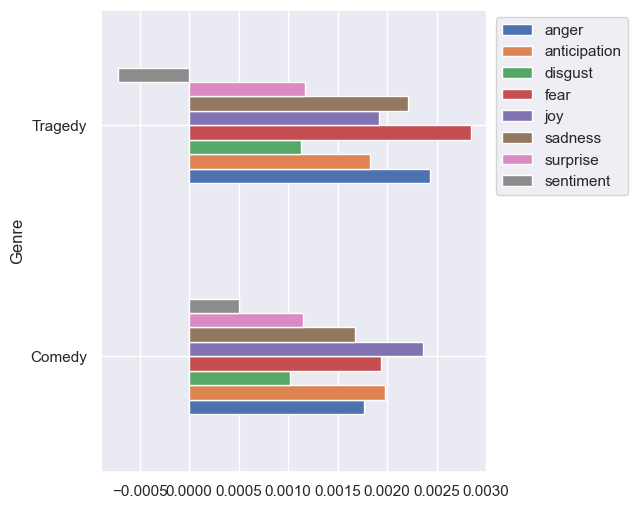

In [26]:
EMO_genre = B.groupby(['Genre'])[emo_cols].mean()

fig, ax = plt.subplots(1)
EMO_genre.plot.barh(figsize=(5,6), ax=ax).legend(bbox_to_anchor=(1.0, 1.0));
fig.savefig(cwd+'/output/images/sentiment_genre.png', bbox_inches='tight')

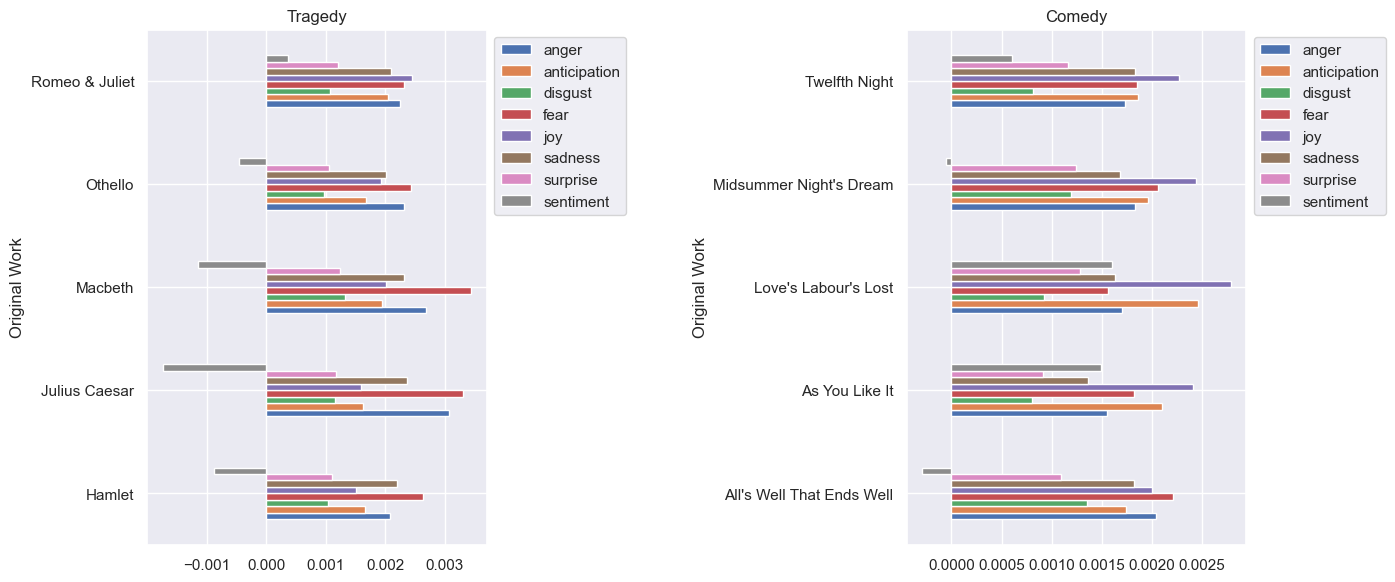

In [27]:
EMO_tragedy_work = B[B.Genre=="Tragedy"].groupby(["Original Work"])[emo_cols].mean()
EMO_comedy_work = B[B.Genre=="Comedy"].groupby(["Original Work"])[emo_cols].mean()

fig, (ax, ax2) = plt.subplots(ncols=2)
fig.tight_layout(pad=6.0)
EMO_tragedy_work.plot.barh(figsize=(18,10), title="Tragedy", ax=ax).legend(bbox_to_anchor=(1.0, 1.0))
EMO_comedy_work.plot.barh(figsize=(18,10), title="Comedy", ax=ax2).legend(bbox_to_anchor=(1.0, 1.0));
fig.savefig(cwd+'/output/images/sentiment_title_genre.png')

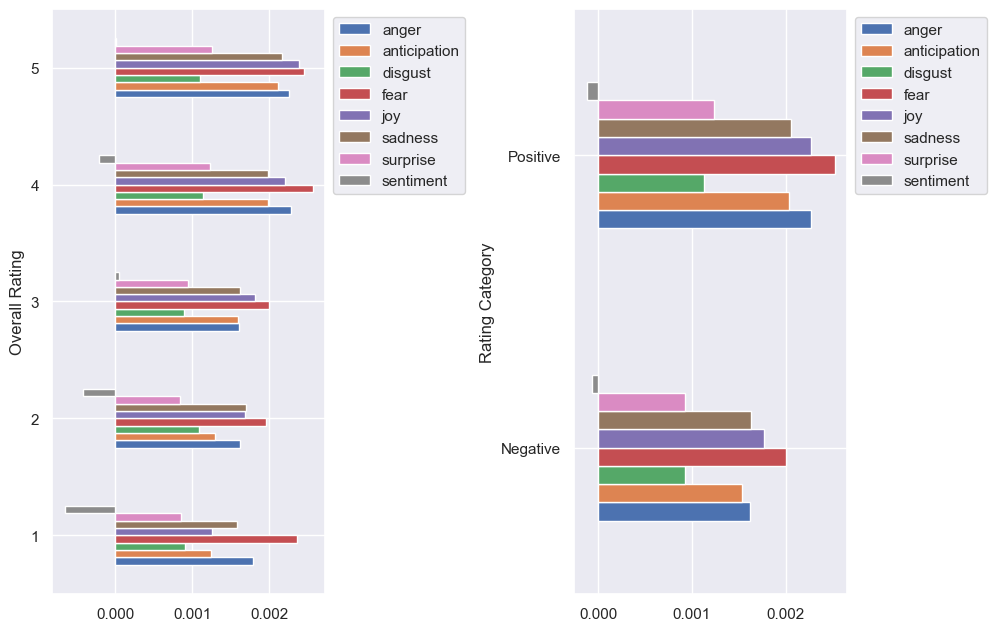

In [28]:
EMO_rating = B.groupby(['Overall Rating'])[emo_cols].mean()
EMO_act_rating = B.groupby(['Rating Category'])[emo_cols].mean()

fig, (ax, ax2) = plt.subplots(ncols=2)
fig.tight_layout(pad=5.0)
EMO_rating.plot.barh(figsize=(12,10), ax=ax).legend(bbox_to_anchor=(1.0, 1.0))
EMO_act_rating.plot.barh(figsize=(12,10), ax=ax2).legend(bbox_to_anchor=(1.0, 1.0));
fig.savefig(cwd+'/output/images/sentiment_rating.png')

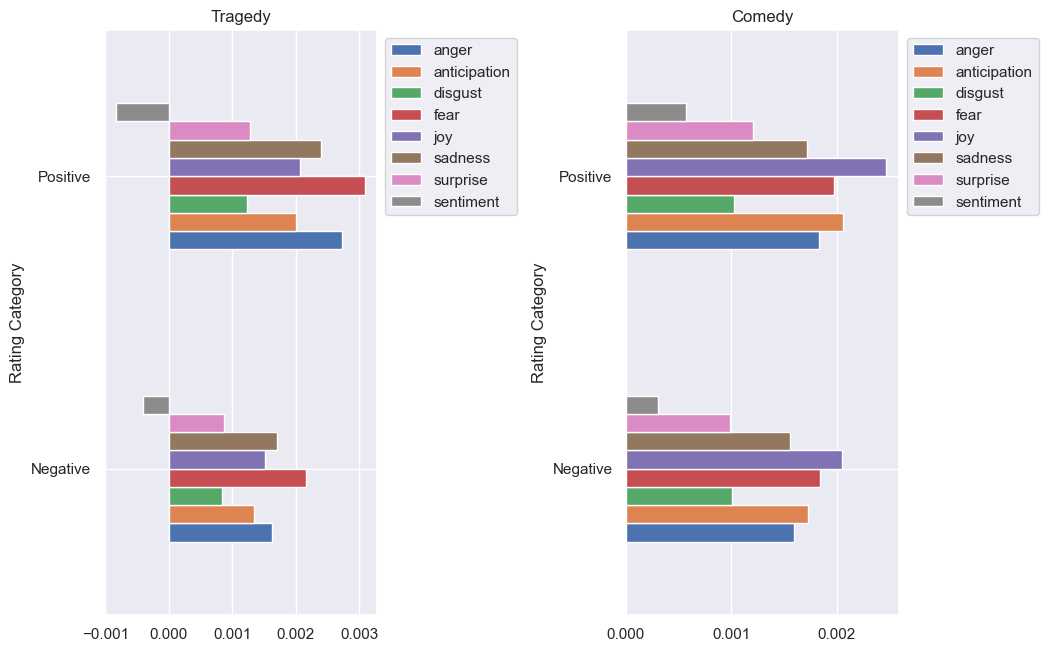

In [29]:
EMO_tragedy_rating = B[B.Genre=="Tragedy"].groupby(["Rating Category"])[emo_cols].mean()
EMO_comedy_rating = B[B.Genre=="Comedy"].groupby(["Rating Category"])[emo_cols].mean()

fig, (ax, ax2) = plt.subplots(ncols=2)
fig.tight_layout(pad=5.0)
EMO_tragedy_rating.plot.barh(figsize=(12,10), title="Tragedy", ax=ax).legend(bbox_to_anchor=(1.0, 1.0))
EMO_comedy_rating.plot.barh(figsize=(12,10), title="Comedy", ax=ax2).legend(bbox_to_anchor=(1.0, 1.0));
fig.savefig(cwd+'/output/images/sentiment_rating_genre.png')

## PCA

In [30]:
tfidf, dfidf = eta_tools.TFIDF(eta_tools.BOW(CORPUS))

VOCAB = VOCAB.join(dfidf.to_frame("dfidf"), on="term_str")

top_nouns = VOCAB[VOCAB["max_pos"].isin(["NN", "NNS"])].sort_values("dfidf", ascending=False).head(1000).index

reduced_tfidf = tfidf[top_nouns.values]

reduced_tfidf.to_csv(cwd+'/output/reduced_tfidf.csv')

reduced_tfidf

term_str                                               story  performances  \
review_id                                                                    
 A Decisive Hamlet in a Post-colonial World         0.114568      0.000000   
"As You Like It" Amiable at the Folger              0.000000      0.000000   
"As You Like It" As It Should Be                    0.156777      0.000000   
80s Throwback is a Dream                            0.000000      0.000000   
A Beautiful Bard Ballet                             0.297877      0.297877   
...                                                      ...           ...   
Witch's View                                        0.000000      0.135399   
Witches Rule in Macbeth's Court                     0.000000      0.000000   
Words, words, words...although not as many as y...  0.000000      0.106385   
Youthful and Musical Twelfth Night at the PST       0.000000      0.087611   
iHamlet at the Philly Fringe                        0.000000      0.000000   

term_str                                               sense  designer  \
review_id                                                                
 A Decisive Hamlet in a Post-colonial World         0.000000  0.000000   
"As You Like It" Amiable at the Folger              0.000000  0.000000   
"As You Like It" As It Should Be                    0.158245  0.000000   
80s Throwback is a Dream                            0.000000  0.000000   
A Beautiful Bard Ballet                             0.000000  0.000000   
...                                                      ...       ...   
Witch's View                                        0.000000  0.000000   
Witches Rule in Macbeth's Court                     0.000000  0.000000   
Words, words, words...although not as many as y...  0.000000  0.000000   
Youthful and Musical Twelfth Night at the PST       0.088431  0.088431   
iHamlet at the Philly Fringe                        0.107380  0.000000   

term_str                                                text     world  \
review_id                                                                
 A Decisive Hamlet in a Post-colonial World         0.000000  0.118921   
"As You Like It" Amiable at the Folger              0.048916  0.055213   
"As You Like It" As It Should Be                    0.000000  0.000000   
80s Throwback is a Dream                            0.000000  0.000000   
A Beautiful Bard Ballet                             0.000000  0.000000   
...                                                      ...       ...   
Witch's View                                        0.000000  0.000000   
Witches Rule in Macbeth's Court                     0.000000  0.000000   
Words, words, words...although not as many as y...  0.000000  0.000000   
Youthful and Musical Twelfth Night at the PST       0.000000  0.000000   
iHamlet at the Philly Fringe                        0.195664  0.000000   

term_str                                            something     roles  \
review_id                                                                 
 A Decisive Hamlet in a Post-colonial World          0.000000  0.000000   
"As You Like It" Amiable at the Folger               0.111462  0.000000   
"As You Like It" As It Should Be                     0.000000  0.082901   
80s Throwback is a Dream                             0.000000  0.000000   
A Beautiful Bard Ballet                              0.000000  0.000000   
...                                                       ...       ...   
Witch's View                                         0.000000  0.000000   
Witches Rule in Macbeth's Court                      0.082130  0.165802   
Words, words, words...although not as many as y...   0.111462  0.000000   
Youthful and Musical Twelfth Night at the PST        0.000000  0.000000   
iHamlet at the Philly Fringe                         0.000000  0.000000   

term_str                                               place       act  ...  \
revi

In [31]:
loadings, dcm, compinf = eta_tools.PCA(X=reduced_tfidf, 
                              k=10, 
                              norm_docs=True, 
                              center_by_mean=False,
                              center_by_variance=False)

In [32]:
dcm  = dcm.join(LIB[['Review Title', "Genre", "Original Work", "Review Author", "Rating Category"]]\
                .set_index("Review Title"), on="review_id")

dcm.to_csv(cwd+'/output/pca_dcm.csv')
loadings.to_csv(cwd+'/output/pca_loadings.csv')
compinf.to_csv(cwd+'/output/pca_compinf.csv')

dcm

PC0       PC1  \
review_id                                                                
 A Decisive Hamlet in a Post-colonial World        -0.281199  0.132093   
"As You Like It" Amiable at the Folger             -0.364338 -0.045779   
"As You Like It" As It Should Be                   -0.380330  0.024363   
80s Throwback is a Dream                           -0.286154 -0.211740   
A Beautiful Bard Ballet                            -0.225687  0.007137   
...                                                      ...       ...   
Witch's View                                       -0.240503  0.182267   
Witches Rule in Macbeth's Court                    -0.312102  0.197198   
Words, words, words...although not as many as y... -0.260915  0.017057   
Youthful and Musical Twelfth Night at the PST      -0.335063  0.051059   
iHamlet at the Philly Fringe                       -0.280008  0.051562   

                                                         PC2       PC3  \
review_id                                                                
 A Decisive Hamlet in a Post-colonial World        -0.089468  0.022599   
"As You Like It" Amiable at the Folger              0.179146  0.221637   
"As You Like It" As It Should Be                    0.054589  0.088016   
80s Throwback is a Dream                           -0.030984 -0.025501   
A Beautiful Bard Ballet                            -0.037428  0.121360   
...                                                      ...       ...   
Witch's View                                       -0.221227 -0.244107   
Witches Rule in Macbeth's Court                    -0.223459 -0.259465   
Words, words, words...although not as many as y... -0.010536  0.055932   
Youthful and Musical Twelfth Night at the PST       0.302196 -0.180056   
iHamlet at the Philly Fringe                       -0.002632  0.036655   

                                                         PC4       PC5  \
review_id                                                                
 A Decisive Hamlet in a Post-colonial World         0.002224 -0.009235   
"As You Like It" Amiable at the Folger             -0.209442 -0.248102   
"As You Like It" As It Should Be                   -0.031039 -0.003658   
80s Throwback is a Dream                            0.024284 -0.046003   
A Beautiful Bard Ballet                             0.128921  0.062244   
...                                                      ...       ...   
Witch's View                                       -0.130539 -0.209997   
Witches Rule in Macbeth's Court                    -0.103705 -0.238339   
Words, words, words...although not as many as y...  0.070155 -0.011511   
Youthful and Musical Twelfth Night at the PST      -0.032622  0.171592   
iHamlet at the Philly Fringe                        0.052275  0.084047   

                                                         PC6       PC7  \
review_id                                                                
 A Decisive Hamlet in a Post-colonial World        -0.052455 -0.101966   
"As You Like It" Amiable at the Folger              0.231649 -0.037270   
"As You Like It" As It Should Be                    0.047473  0.027130   
80s Throwback is a Dream                           -0.019079 -0.066801   
A Beautiful Bard Ballet                             0.040483 -0.021832   
...                                                      ...       ...   
Witch's View                                       -0.087668  0.012867   
Witches Rule in Macbeth's Court                    -0.075295 -0.097270   
Words, words, words...although not as many as y... -0.000352 -0.005809   
Youthful and Musical Twelfth Night at the PST       0.086665  0.083624   
iHamlet at the Philly Fringe                        0.007015 -0.041170   

                                                         PC8       PC9  \
review_id                                                                
 A Decisive Hamlet in a Post-colonial World        -0.086

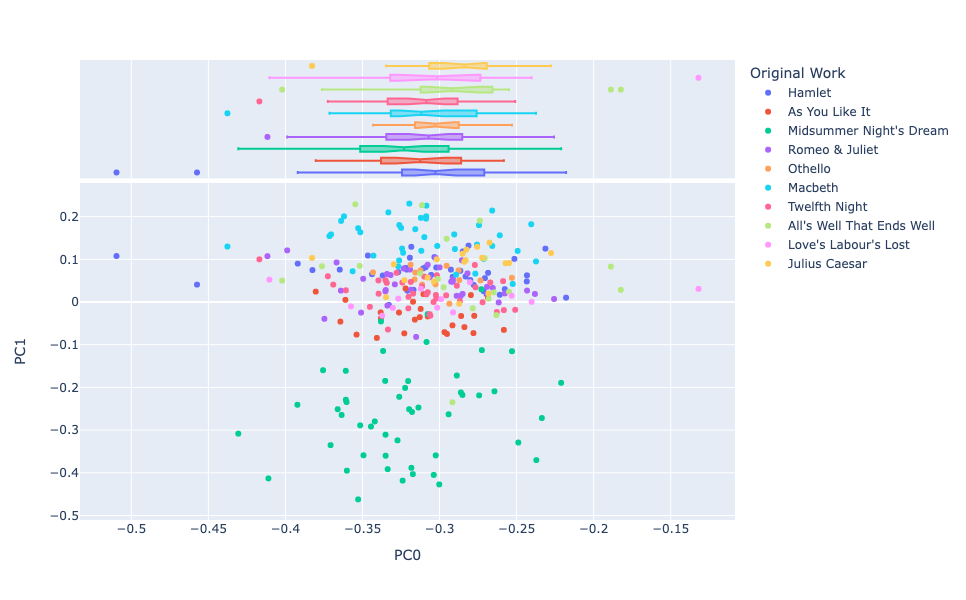

In [33]:
eta_tools.vis_pcs(dcm, 0, 1, label='Original Work', hover_name="Original Work")

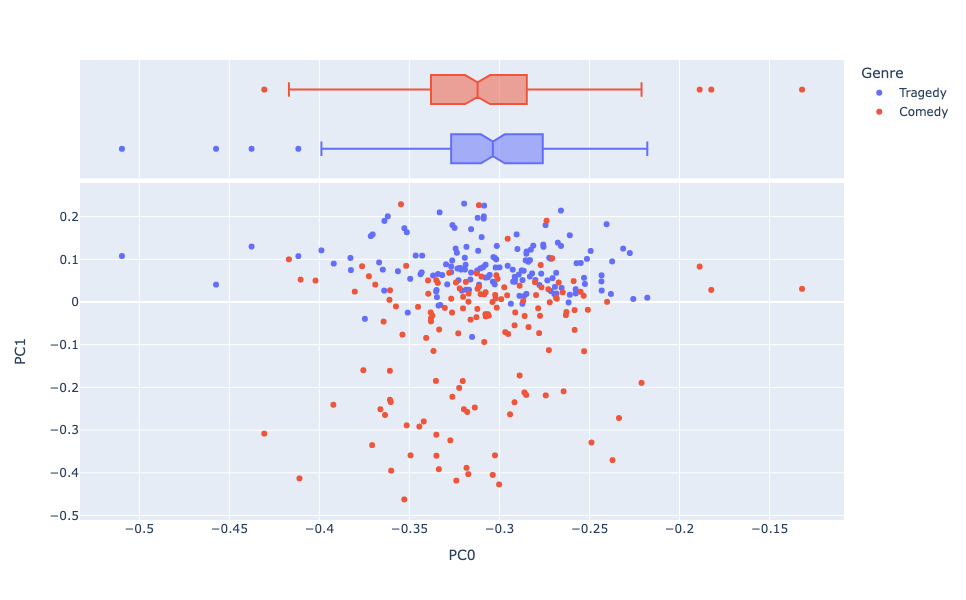

In [34]:
eta_tools.vis_pcs(dcm, 0, 1, label='Genre', hover_name="Original Work")

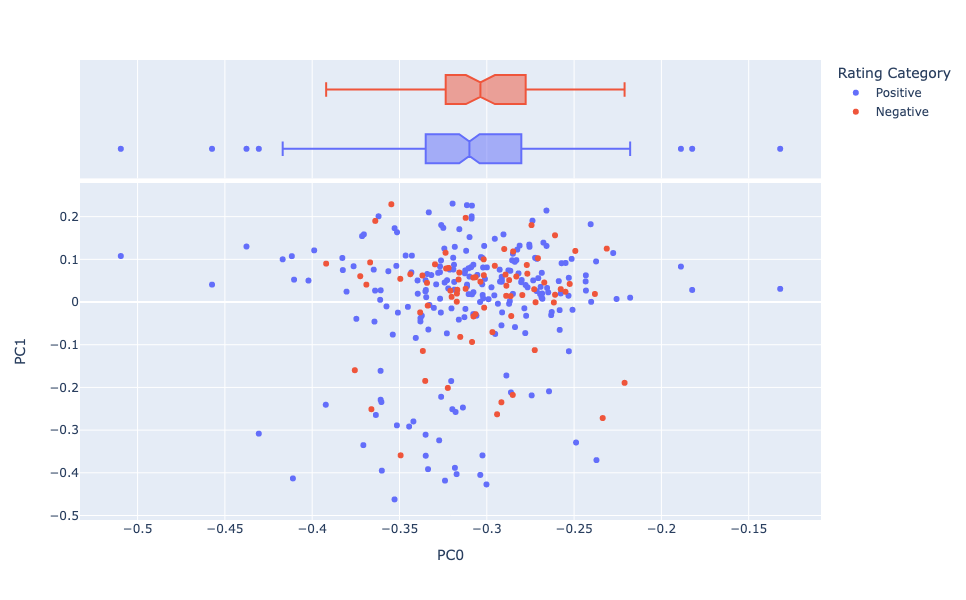

In [35]:
eta_tools.vis_pcs(dcm, 0, 1, label='Rating Category', hover_name="Original Work")

## Word Embeddings

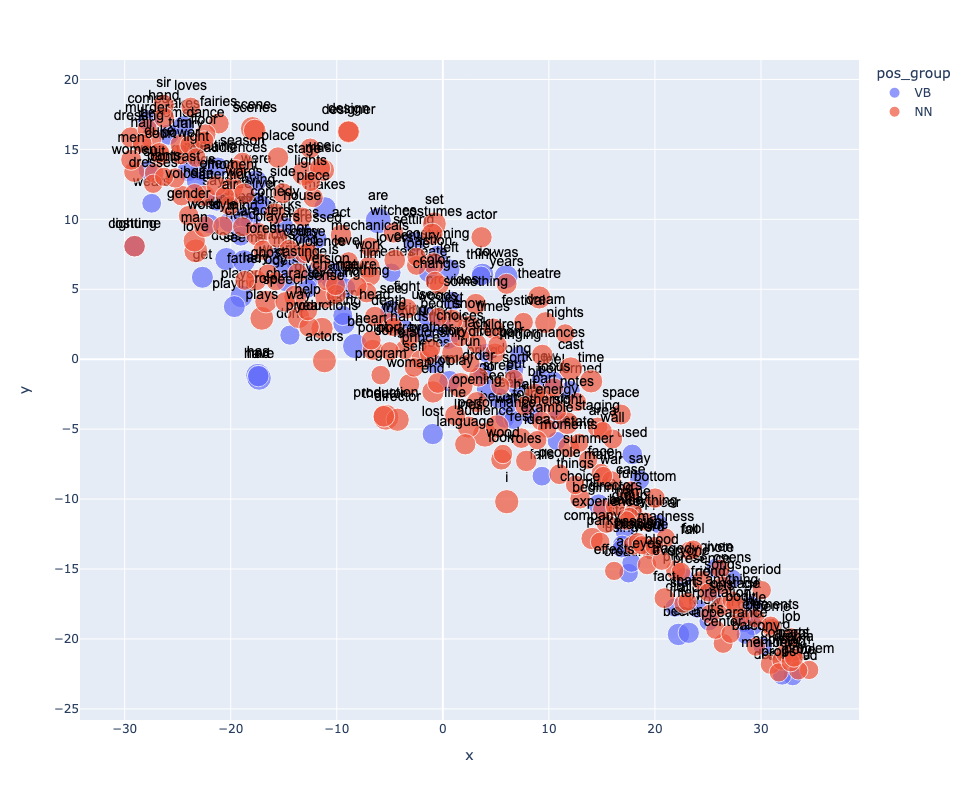

In [53]:
gensim = eta_tools.gensim_corpus(CORPUS, ['review_id'])

gensim.word2vec(min_count=50)

gensim.generate_coords()

gensim.plot().show()

In [54]:
gensim.get_most_similar("design")

term       sim
0   designer  0.999268
1        set  0.998449
2   lighting  0.998365
3   costumes  0.998081
4      sound  0.998072
5    costume  0.997958
6    effects  0.997803
7      dress  0.997739
8      music  0.997659
9  costuming  0.997592

In [55]:
gensim.get_most_similar("actor")

term       sim
0       role  0.999302
1     giving  0.999284
2      lines  0.999283
3  character  0.999281
4     proves  0.999274
5       give  0.999274
6       gets  0.999269
7       case  0.999268
8       wife  0.999267
9      plays  0.999257